In [13]:
import numpy as np
from scipy.stats import chi2_contingency

def check_drift(dataset_train, dataset_prod):
    # Create contingency table from the datasets
    observed = np.array(
        [
            [
                np.sum(dataset_train == "Single"),
                np.sum(dataset_train == "Married"),
                np.sum(dataset_train == "Divorced"),
            ],
            [
                np.sum(dataset_prod == "Single"),
                np.sum(dataset_prod == "Married"),
                np.sum(dataset_prod == "Divorced"),
            ],
        ]
    )

    # Perform chi-squared test
    chi2, p_value, _, _ = chi2_contingency(observed)

    # Set significance level
    alpha = 0.05

    print(f"P-value: {p_value:.4f}")

    # Check if there is a significant difference
    if p_value < alpha:
        print(
            "Data drift detected: There is a significant difference in the categorical variable distribution."
        )
    else:
        print(
            "No data drift detected: There is no significant difference in the categorical variable distribution."
        )

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def plot_frequencies(categories, dataset_train, dataset_prod):
    # Calc frequencies
    counts_train = [np.sum(dataset_train == category) for category in categories]
    counts_prod = [np.sum(dataset_prod == category) for category in categories]

    # Plot graph
    plt.figure(figsize=(8, 6))

    x = np.arange(len(categories))
    width = 0.35

    plt.bar(x - width / 2, counts_train, width, label="Dataset Train")
    plt.bar(x + width / 2, counts_prod, width, label="Dataset Production")

    plt.xlabel("Categories")
    plt.ylabel("Frequency")
    plt.title("Comparison of Dataset Train and Dataset Production")

    plt.xticks(x, categories)
    plt.legend()
    plt.show()

In [15]:
categories = ['Single', 'Married', 'Divorced']

# Generate two example datasets
dataset_train = np.random.choice(categories, size=1000, p=[0.49, 0.3, 0.21])
dataset_prod = np.random.choice(categories, size=1000, p=[0.50, 0.3, 0.2])

# Print example of generated data
print(dataset_train)

['Single' 'Divorced' 'Single' 'Married' 'Single' 'Married' 'Married'
 'Married' 'Single' 'Single' 'Divorced' 'Married' 'Single' 'Single'
 'Single' 'Married' 'Married' 'Married' 'Divorced' 'Married' 'Divorced'
 'Single' 'Single' 'Divorced' 'Divorced' 'Single' 'Divorced' 'Single'
 'Divorced' 'Single' 'Single' 'Divorced' 'Single' 'Single' 'Single'
 'Divorced' 'Married' 'Married' 'Divorced' 'Single' 'Married' 'Single'
 'Married' 'Single' 'Married' 'Married' 'Married' 'Married' 'Single'
 'Divorced' 'Married' 'Single' 'Divorced' 'Divorced' 'Single' 'Single'
 'Single' 'Single' 'Single' 'Married' 'Married' 'Single' 'Single'
 'Married' 'Married' 'Married' 'Married' 'Single' 'Married' 'Married'
 'Divorced' 'Married' 'Single' 'Single' 'Single' 'Single' 'Single'
 'Married' 'Married' 'Single' 'Divorced' 'Single' 'Single' 'Single'
 'Divorced' 'Married' 'Divorced' 'Single' 'Single' 'Divorced' 'Divorced'
 'Married' 'Divorced' 'Single' 'Married' 'Single' 'Single' 'Single'
 'Single' 'Divorced' 'Divorced

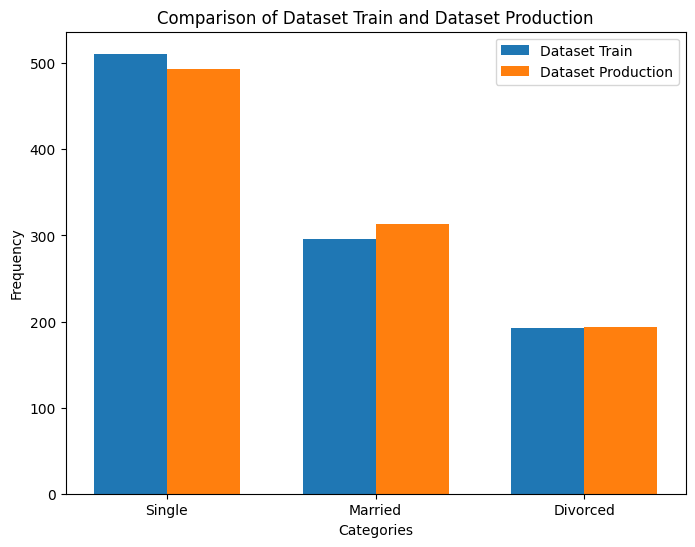

In [16]:
plot_frequencies(categories, dataset_train, dataset_prod)

In [17]:
check_drift(dataset_train, dataset_prod)

P-value: 0.6704
No data drift detected: There is no significant difference in the categorical variable distribution.


In [18]:
# Generate two example datasets
dataset_train = np.random.choice(categories, size=1000, p=[0.4, 0.3, 0.3])
dataset_prod = np.random.choice(categories, size=1000, p=[0.5, 0.3, 0.2])

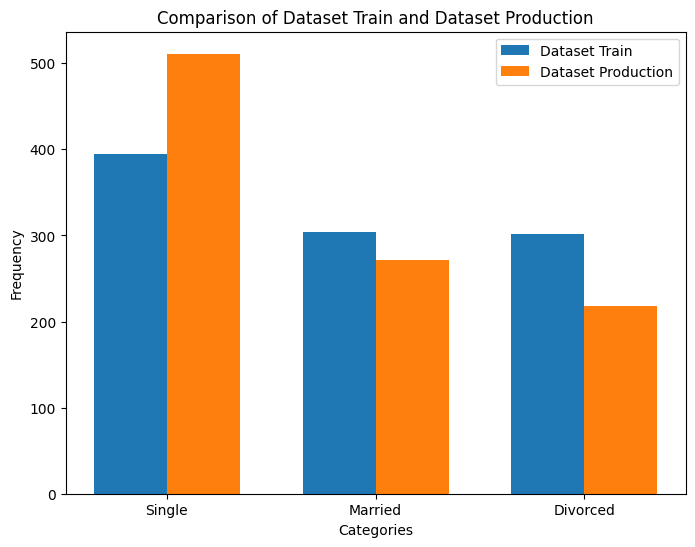

In [19]:
plot_frequencies(categories, dataset_train, dataset_prod)

In [20]:
check_drift(dataset_train, dataset_prod)

P-value: 0.0000
Data drift detected: There is a significant difference in the categorical variable distribution.
